## This notebook
- loads a parquet file from `./outfiles` for exploration
- runs over HWW semileptonic sample... one root file...
- makes stacked hist plots to compare the different cuts
- makes 2d plots to cross-check any pair of variables (e.g. lep_pt vs jet_pt)

In [54]:
import json
import uproot
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from coffea import nanoevents
from coffea import processor
import time

import argparse
import warnings
import pyarrow as pa
import pyarrow.parquet as pq
import pickle as pkl
import pandas as pd
import os
import sys
sys.path.append("../")

from collections import defaultdict
import pickle as pkl
import pyarrow as pa
import awkward as ak
import numpy as np
import pandas as pd
import json
import os
import shutil
import pathlib
from typing import List, Optional
import pyarrow.parquet as pq

from coffea import processor
from coffea.nanoevents.methods import candidate, vector
from coffea.analysis_tools import Weights, PackedSelection
from boostedhiggs.utils import match_HWW
from boostedhiggs.btag import btagWPs
from boostedhiggs.btag import BTagCorrector

import hist as hist2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
from hist.intervals import clopper_pearson_interval

import warnings
warnings.filterwarnings("ignore", message="Found duplicate branch ")
warnings.filterwarnings("ignore", category=DeprecationWarning)
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

# Load metadata and get sample name

In [55]:
job_name = '/0-20'
channels=['ele', 'mu', 'had']

In [56]:
with open("./outfiles" + job_name + '.pkl', 'rb') as f:
    metadata = pkl.load(f)
    
for key in metadata.keys():
    sample = key

print(sample)

GluGluHToWWToLNuQQ


# Load the parquet files

In [57]:
data = {}
data_jets = {}
metadata = {}

data[sample] = {}

for ch in channels:
    data[sample][ch] = pq.read_table("./outfiles/" + job_name + '_' + ch + '.parquet').to_pandas()

# Investigate the parquet files

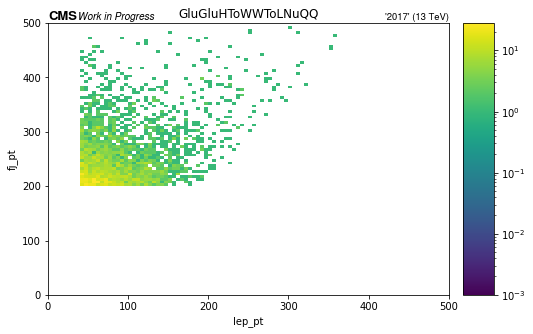

In [58]:
# lep_pt vs fj_pt
h = hist2.Hist(
    hist2.axis.Regular(100,0, 500, name='lep_pt', label='lep_pt', flow=True),    
    hist2.axis.Regular(100,0, 500, name='fj_pt', label='fj_pt', flow=True),
)

h.fill(data[sample]['ele']['lep_pt'], data[sample]['ele']['fj_pt']
)

odir = sample + "/plots/"

fig, ax = plt.subplots(figsize=(8, 5))
hep.hist2dplot(h, ax=ax, norm=matplotlib.colors.LogNorm(vmin=1e-3))    
ax.set_title(f'{sample}')
hep.cms.lumitext(f"'2017' (13 TeV)", ax=ax)
hep.cms.text("Work in Progress", ax=ax)


if not os.path.exists(f'{odir}/'):
    os.makedirs(f'{odir}/')

plt.savefig(f'{odir}/fj_pt_vs_lep_pt.pdf')